In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("daily-min-temperatures.csv", index_col = 0, header=0, parse_dates = [0])
print(df)

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]


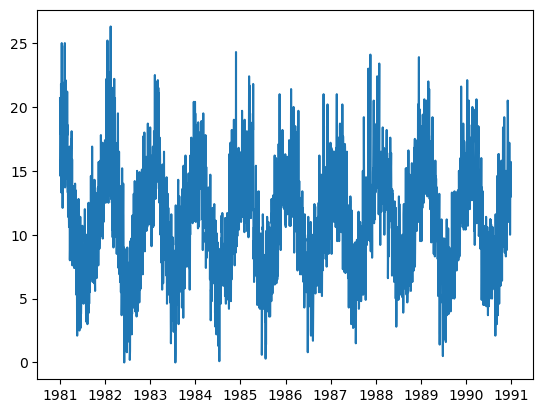

In [4]:
plt.plot(df)
plt.show()

In [5]:
df.dtypes

Temp    float64
dtype: object

In [15]:
df1 = pd.read_csv("daily-min-temperatures.csv")
df1.dtypes

Date     object
Temp    float64
dtype: object

In [16]:
df1['Date'] = pd.to_datetime(df1['Date'], format = "%Y-%m-%d")
df1

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [18]:
df1['Month'] = df1['Date'].dt.month
df1['Month name'] = df1['Month'].map({
    1:"Jan",
    2:"Feb",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"})
df1

,Date,Temp,Month,Month name
0,1981-01-01,20.7,1,Jan
1,1981-01-02,17.9,1,Jan
2,1981-01-03,18.8,1,Jan
3,1981-01-04,14.6,1,Jan
4,1981-01-05,15.8,1,Jan
...,...,...,...,...
3645,1990-12-27,14.0,12,December
3646,1990-12-28,13.6,12,December
3647,1990-12-29,13.5,12,December
3648,1990-12-30,15.7,12,December


In [20]:
df1['Quarter'] = df1['Date'].dt.quarter
df1

,Date,Temp,Month,Month name,Quarter
0,1981-01-01,20.7,1,Jan,1
1,1981-01-02,17.9,1,Jan,1
2,1981-01-03,18.8,1,Jan,1
3,1981-01-04,14.6,1,Jan,1
4,1981-01-05,15.8,1,Jan,1
...,...,...,...,...,...
3645,1990-12-27,14.0,12,December,4
3646,1990-12-28,13.6,12,December,4
3647,1990-12-29,13.5,12,December,4
3648,1990-12-30,15.7,12,December,4


In [26]:
df1['Day'] = df1['Date'].dt.dayofweek
df1['Day name'] = df1['Day'].map({
    0:'Monday',
    1:'Tuesday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'})
df1

,Date,Temp,Month,Month name,Quarter,Day,Day name
0,1981-01-01,20.7,1,Jan,1,3,Wednesday
1,1981-01-02,17.9,1,Jan,1,4,Thursday
2,1981-01-03,18.8,1,Jan,1,5,Friday
3,1981-01-04,14.6,1,Jan,1,6,Saturday
4,1981-01-05,15.8,1,Jan,1,0,Monday
...,...,...,...,...,...,...,...
3645,1990-12-27,14.0,12,December,4,3,Wednesday
3646,1990-12-28,13.6,12,December,4,4,Thursday
3647,1990-12-29,13.5,12,December,4,5,Friday
3648,1990-12-30,15.7,12,December,4,6,Saturday


In [38]:
#lag
temps = pd.DataFrame(df.values)
df = pd.concat([temps.shift(1), temps], axis=1)
df.columns = ['t+1', 't']
df

,t+1,t
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
...,...,...
3645,14.6,14.0
3646,14.0,13.6
3647,13.6,13.5
3648,13.5,15.7


In [39]:
df.drop([0], axis = 0, inplace=True)
df

,t+1,t
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
5,15.8,15.8
...,...,...
3645,14.6,14.0
3646,14.0,13.6
3647,13.6,13.5
3648,13.5,15.7


In [42]:
df = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1)], axis = 1)
df.columns = ['t+3', 't+2', 't+1', 't']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements